In [1]:
import numpy as np
import pandas as pd
from time import time

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df_all = pd.read_csv("../../datasets/training_2nd_dataset.csv")

In [3]:
app_uni = df_all['domain_name'].value_counts()
app_uni

domain_10    2475308
domain_8     1906956
domain_12    1883723
domain_6     1052742
domain_20     550032
domain_18     503443
domain_16     336196
domain_4      291600
Name: domain_name, dtype: int64

In [4]:
np.mean(app_uni)

1125000.0

In [5]:
app_uni.index.to_list()

['domain_10',
 'domain_8',
 'domain_12',
 'domain_6',
 'domain_20',
 'domain_18',
 'domain_16',
 'domain_4']

In [6]:
app_g_site = df_all.groupby(['domain_name'])['node_name'].nunique()
app_g_site

domain_name
domain_10    483
domain_12    458
domain_16    221
domain_18    286
domain_20    228
domain_4     114
domain_6     430
domain_8     452
Name: node_name, dtype: int64

In [7]:
dict_month = {'domain':app_g_site.index,'numbers sites':app_g_site.values}
df_app = pd.DataFrame(dict_month)
df_app.sort_values(by=['numbers sites'],ascending=False, inplace=True)
df_app

,domain,numbers sites
0,domain_10,483
1,domain_12,458
7,domain_8,452
6,domain_6,430
3,domain_18,286
4,domain_20,228
2,domain_16,221
5,domain_4,114


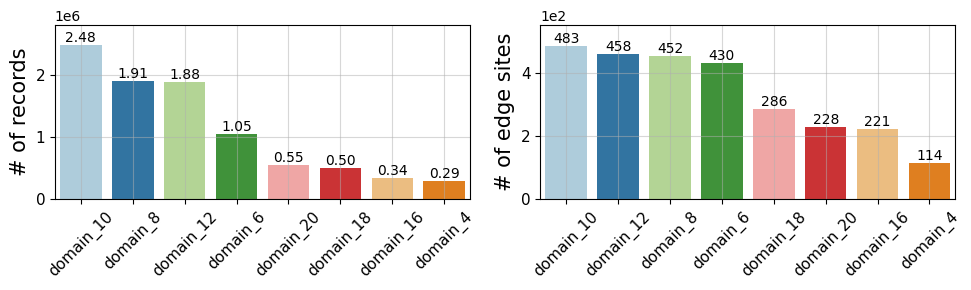

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10,3), dpi=100)
sns.set_palette("Paired")
labels = app_uni.index.to_list()
A_as_ticklabel = [f"{a/1e6:.2f}" for a in app_uni.values]
ax1 = sns.barplot(x=labels, y = app_uni.values, ax=axes[0])
ax1.grid(alpha=0.5)
# ax1.set_yticklabels(fontsize=11)
ax1.tick_params(axis='both', which='major', labelsize=11)
ax1.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
ax1.set_xticklabels(labels = labels, rotation = 45, fontsize=11)
# ax1.set_yscale('log')
# ax1.set_xlabel('(a) The feature importance of LightGBM in the gerneral environment.' , fontsize=15)
ax1.set_ylabel('# of records', fontsize=15)
ax1.bar_label(ax1.containers[0], label_type='edge', labels=A_as_ticklabel)
ax1.set_ylim(top=2.8*1e6)

# labels_2 = app_g_site.index.to_list()
A_as_ticklabel2 = [f"{a}" for a in df_app['numbers sites'].values]
ax2 = sns.barplot(x=df_app['domain'].to_list(), y = df_app['numbers sites'].values, ax=axes[1])
ax2.grid(alpha=0.5)
# ax1.set_yticklabels(fontsize=11)
ax2.tick_params(axis='both', which='major', labelsize=11)
ax2.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
ax2.set_xticklabels(labels = df_app['domain'].to_list(), rotation = 45, fontsize=11)
# ax1.set_yscale('log')
# ax1.set_xlabel('(a) The feature importance of LightGBM in the gerneral environment.' , fontsize=15)
ax2.set_ylabel('# of edge sites', fontsize=15)
ax2.bar_label(ax2.containers[0], label_type='edge', labels=A_as_ticklabel2)
ax2.set_ylim(top=550)

fig.tight_layout()
# fig.savefig('./data_scale.pdf')